In [1]:
# https://stackoverflow.com/a/47311878/1164295

%matplotlib notebook

In [2]:
%matplotlib inline

In [3]:
import pandas
from matplotlib import pyplot as plt
import matplotlib
import seaborn
import numpy as np
import sys

In [4]:
sys.version_info

sys.version_info(major=3, minor=10, micro=8, releaselevel='final', serial=0)

In [5]:
print("matplotlib", matplotlib.__version__)
print("seaborn", seaborn.__version__)
print("pandas", pandas.__version__)
print("numpy", np.__version__)

matplotlib 3.6.2
seaborn 0.12.2
pandas 1.5.2
numpy 1.23.5


In [6]:
a = 4
number_of_iterations = 10

Given a functional relation 

                    +--<------------------------<--+
                    |                              |
                   c|     +----+         +----+  c |
                    +---->|    |         |    +->--+
                          | B  |  b      | C  |
                a ------->|    +-------->|    +-------> d
                          +----+         +----+

What is the value of `d` as a function of `a`?

Graph created using https://asciiflow.com/#/

In [7]:
def B(c: int, a: int) -> int:
    """
    """
    b = a + c
    return b

In [8]:
def C(b: int):
    """
    """
    c = b+1
    d = b+2
    return c,d

In [9]:
results = []
c_list = [2,3,4,5,6]
for initial_c in c_list:
    c = initial_c
    for iteration_index in range(number_of_iterations):
        b = B(c, a)
        c, d = C(b)
        this_loop_dict = {'index': iteration_index,
                          '$c_{initial}$': initial_c,
                          'a': a,
                          'b': b,
                          'c': c,
                          'd': d}
        results.append(this_loop_dict)

In [10]:
df = pandas.DataFrame(results)

In [11]:
# https://www.python-graph-gallery.com/90-heatmaps-with-various-input-format

df_wide = df.pivot_table( index='index', columns='$c_{initial}$', values='d')

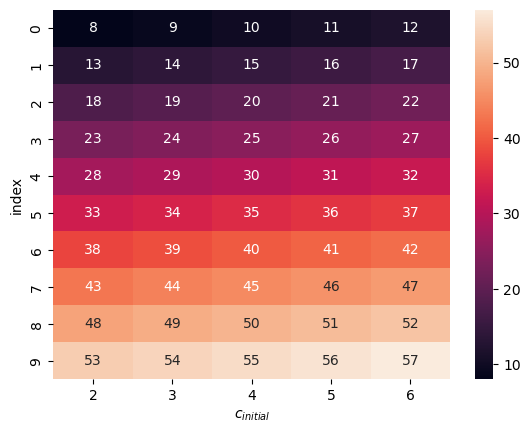

In [12]:
# https://seaborn.pydata.org/examples/spreadsheet_heatmap.html

seaborn.heatmap(df_wide, annot=True);

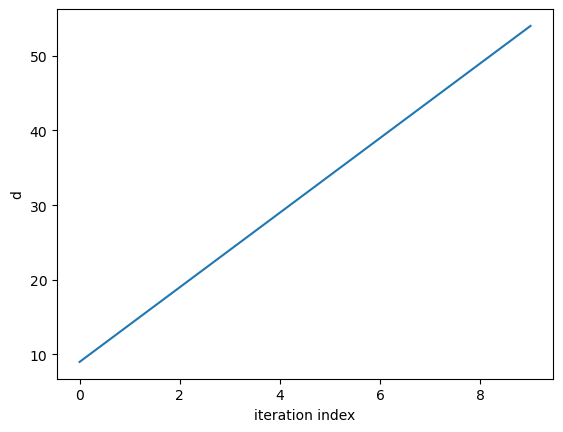

In [13]:
initial_c = 3
plt.plot(df_wide[initial_c]);
plt.xlabel('iteration index')
plt.ylabel('d');

In [14]:
df_wide.shape

(10, 5)

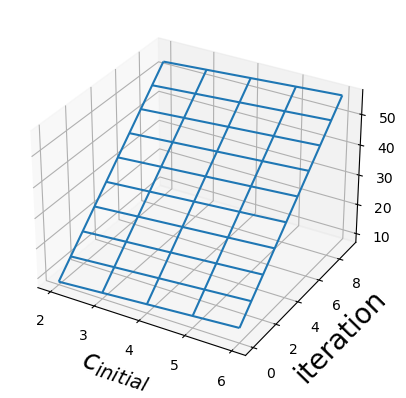

In [15]:
axes = plt.axes(projection='3d')

col, ind = np.meshgrid(df_wide.columns, df_wide.index)

axes.plot_wireframe(col, ind, df_wide)
plt.gca().set_xlabel('$c_{initial}$', fontsize=20)
plt.gca().set_ylabel('iteration', fontsize=20)
plt.gca().set_zlabel('d', fontsize=20);
plt.show()